In [3]:
#Import necessary packages 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from datetime import date, timedelta
from sklearn.model_selection import TimeSeriesSplit
%matplotlib inline
import os

In [4]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [6]:
# load the dataset
df = pd.read_csv('df5.csv', index_col=0)

In [5]:
df.head()

,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,date,dayOfWeek,ave_vader,daily_sentiment,compound,overall_sentiment,Pos_minus_Neg
133,20.04,52,17,96,165,13.7954,"['Positive', ' Neutral', ' Neutral', ' Positiv...","Gold Gains Traction (GLD, GDX, IAG, NEM, ABX),...","['ABX', ' ACTG', ' AEIS', ' AEO', ' AEO', ' AF...",2010-01-04,Monday,0.083608,Positive,0.9982,Positive,35
134,19.35,84,15,103,202,34.1086,"['Neutral', ' Negative', ' Neutral', ' Positiv...",Advance Auto Parts – A Turnaround Candidate (A...,"['AAP', ' ACE', ' ACN', ' ACN', ' ADBE', ' AEO...",2010-01-05,Tuesday,0.168854,Positive,0.9997,Positive,69
135,19.16,74,8,86,168,23.6630,"['Neutral', ' Neutral', ' Positive', ' Positiv...","Insurance Sector Overview - 2010 (AGII, SBX, A...","['ACE', ' AEIS', ' AGQ', ' AKS', ' ALL', ' ARE...",2010-01-06,Wednesday,0.140851,Positive,0.9993,Positive,66
136,19.06,90,29,106,225,24.1130,"['Positive', ' Negative', ' Neutral', ' Negati...","Benzinga’s Top Downgrades (WEN, CMP, ACL, PPDI...","['ABC', ' ACN', ' AEO', ' AEO', ' AER', ' AET'...",2010-01-07,Thursday,0.107169,Positive,0.9986,Positive,61
137,18.13,80,26,111,217,16.3447,"['Negative', ' Neutral', ' Positive', ' Negati...",Gold Finishes Lower After Pressure from the Do...,"['ABX', ' AEO', ' AGU', ' AGU', ' AIB', ' AKS'...",2010-01-08,Friday,0.075321,Positive,0.9984,Positive,54


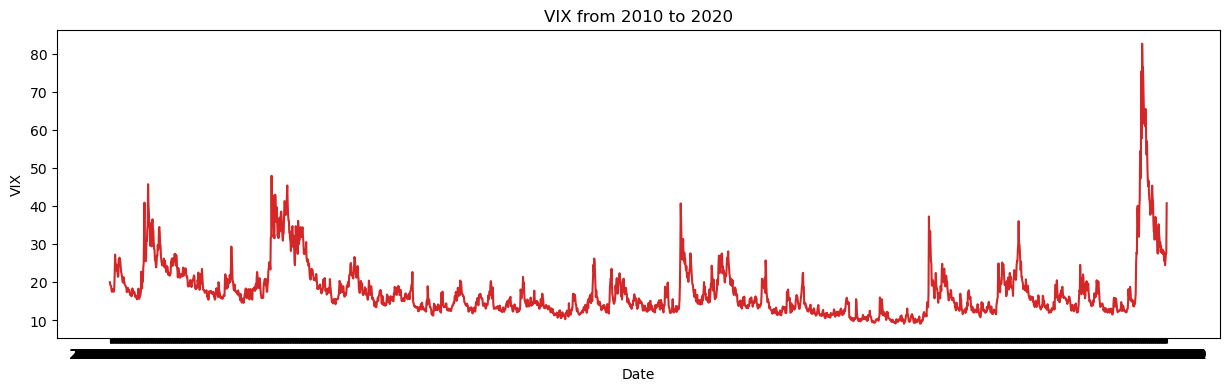

In [6]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df, x=df['date'], y=df['CLOSE'], title='VIX from 2010 to 2020', ylabel='VIX')

## Autocorrelation

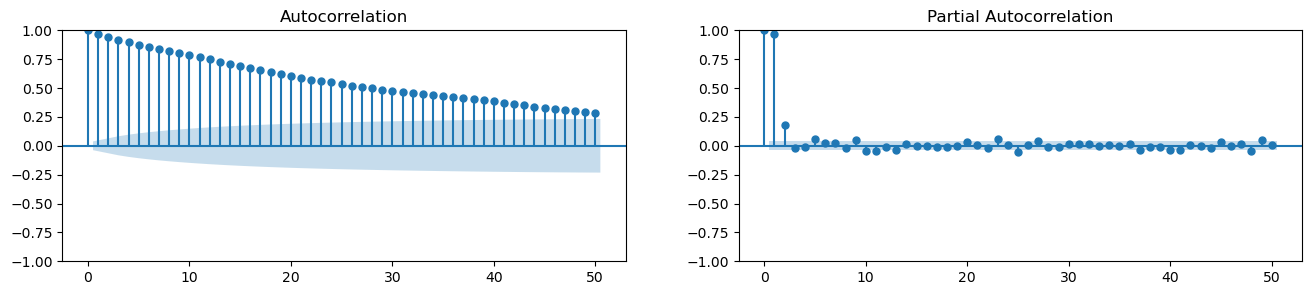

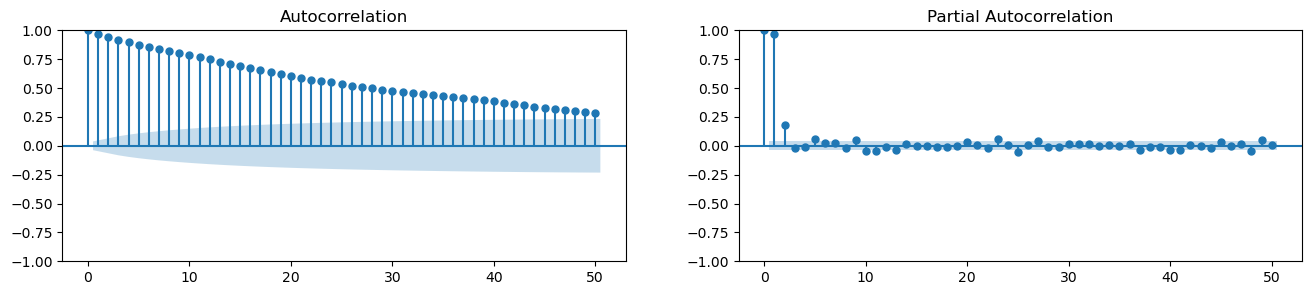

In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['CLOSE'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['CLOSE'].tolist(), lags=50, ax=axes[1])

## Lag Plot

In [8]:
## Add lag plot funtion to library
values = pd.DataFrame(df['CLOSE'].values)
lags = 9
columns = [values] 
for i in range(1,(lags + 1)):
    columns.append(values.shift(i)) 
dataframe = pd.concat(columns, axis=1) 
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns

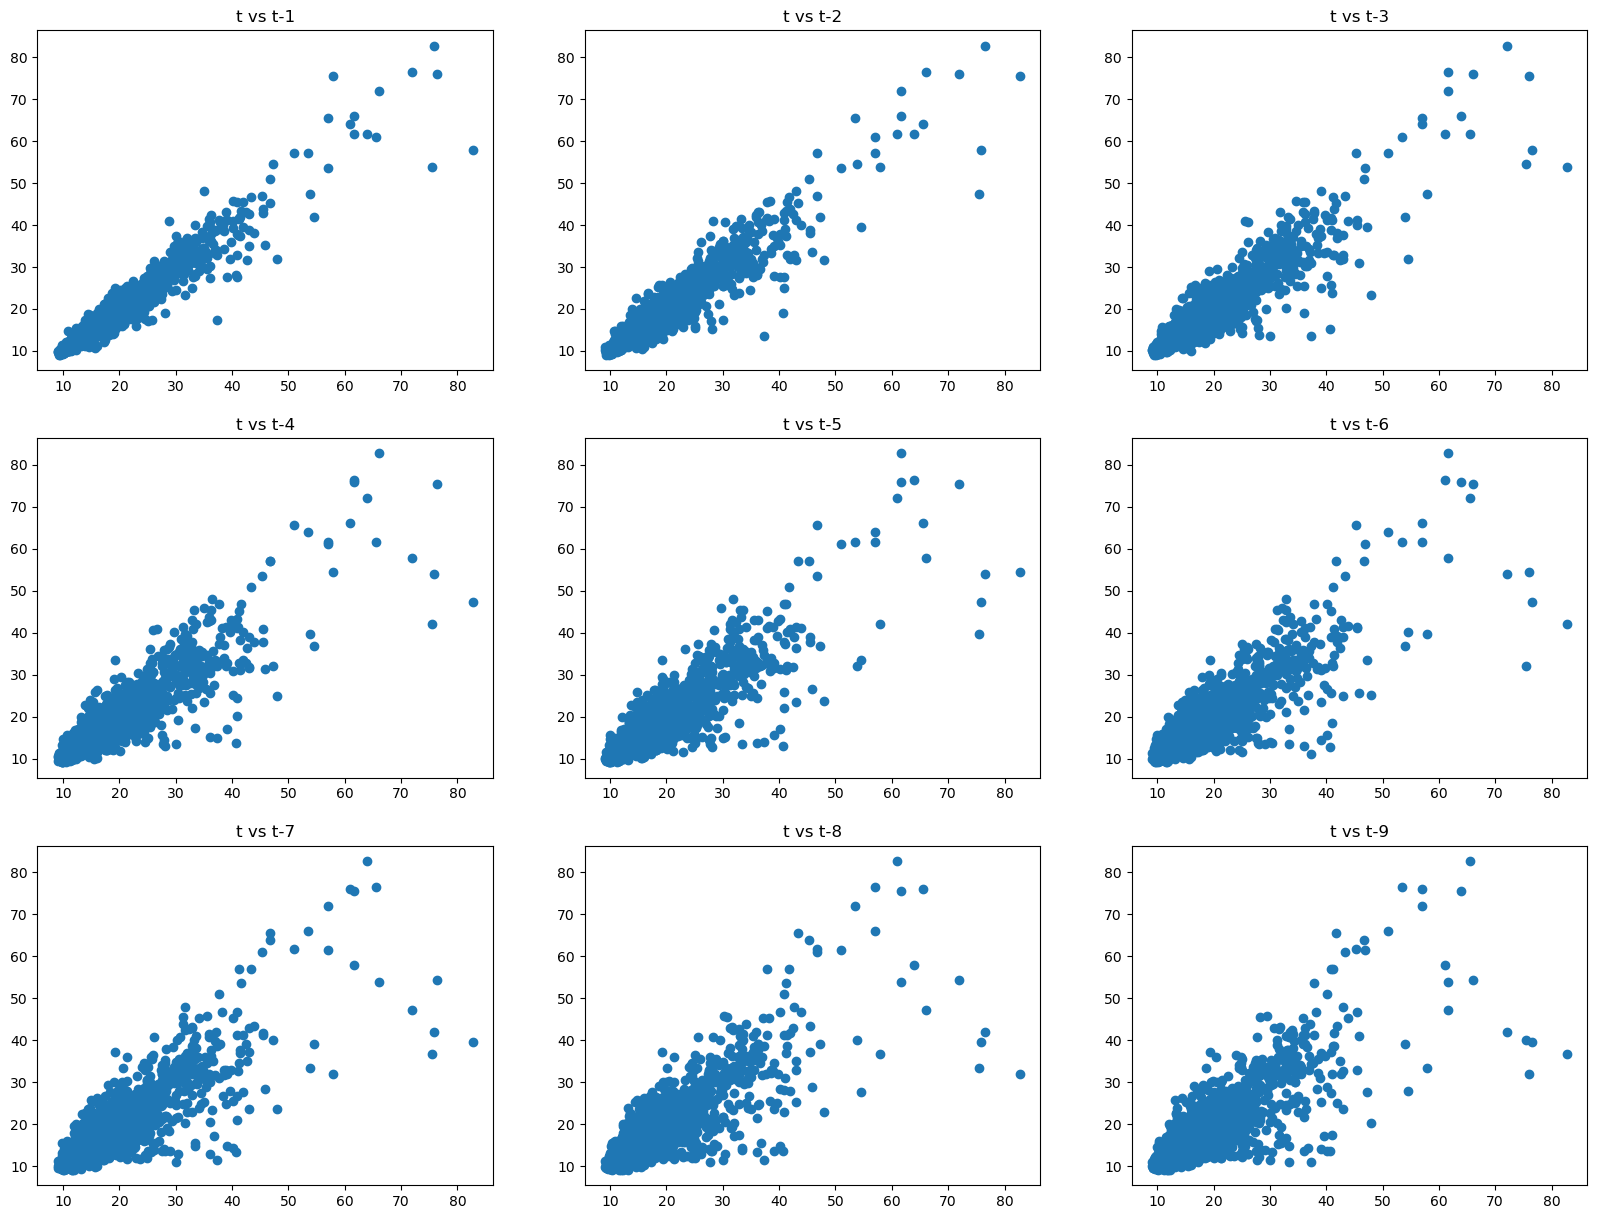

In [9]:
plt.figure(figsize = (20,15))

for i in range(1,(lags + 1)):
    ax = plt.subplot(330 + i)
    ax.set_title('t vs t-' + str(i)) 
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)

plt.show();

## Moving Averages

Text(0.5, 0, 'Date')

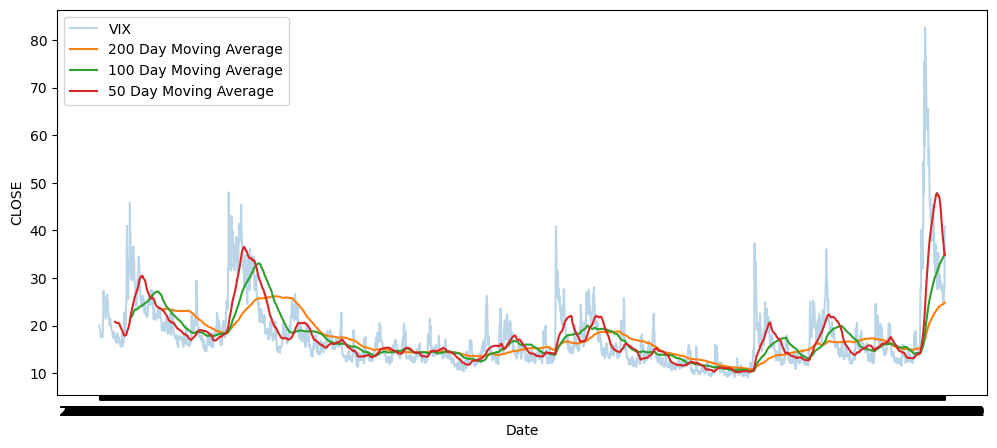

In [10]:
## Write a function to do this
# Moving average plot
# computing a 5 day rolling average 
df[ '200day_rolling_avg' ] = df.CLOSE.rolling( 200).mean()
df[ '100day_rolling_avg' ] = df.CLOSE.rolling( 100).mean() 
df[ '50day_rolling_avg' ] = df.CLOSE.rolling( 50).mean()  
# viewing the dataset 
# df.head(10) 
# set figure size 
plt.figure( figsize = ( 12, 5)) 
  
# plot a simple time series plot 
# using seaborn.lineplot() 
sns.lineplot( x = 'date', 
             y = 'CLOSE', 
             data = df, 
             label = 'VIX',
             alpha=.3) 
sns.lineplot( x = 'date', 
             y = '200day_rolling_avg', 
             data = df, 
             label = '200 Day Moving Average') 
sns.lineplot( x = 'date', 
             y = '100day_rolling_avg', 
             data = df, 
             label = '100 Day Moving Average') 
sns.lineplot( x = 'date', 
             y = '50day_rolling_avg', 
             data = df, 
             label = '50 Day Moving Average')
plt.xlabel( 'Date') 

Text(0.5, 0, 'Date')

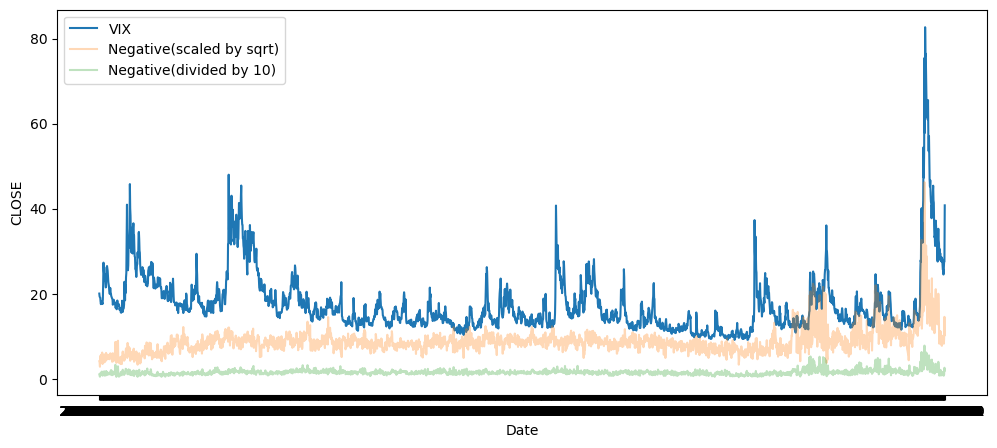

In [11]:
## Write a function to do this
# scaling comparison plot   
# set figure size 
df['scaled_sqrt'] = np.sqrt(df['Negative'])
df['scaled_div10'] = 10 * df['Negative']/df['Total']
plt.figure( figsize = ( 12, 5)) 
  
# plot a simple time series plot 
# using seaborn.lineplot() 
sns.lineplot( x = 'date', 
             y = 'CLOSE', 
             data = df, 
             label = 'VIX') 
sns.lineplot( x = 'date', 
             y = 'scaled_sqrt', 
             data = df, 
             label = 'Negative(scaled by sqrt)',
             alpha=.3) 
sns.lineplot( x = 'date', 
             y = 'scaled_div10', 
             data = df, 
             label = 'Negative(divided by 10)',
             alpha=.3) 
# sns.lineplot( x = 'date', 
#              y = '50day_rolling_avg', 
#              data = df, 
#              label = '50 Day Moving Average')
plt.xlabel( 'Date') 

## Standard ARIMA time series

Test RMSE: 3.303


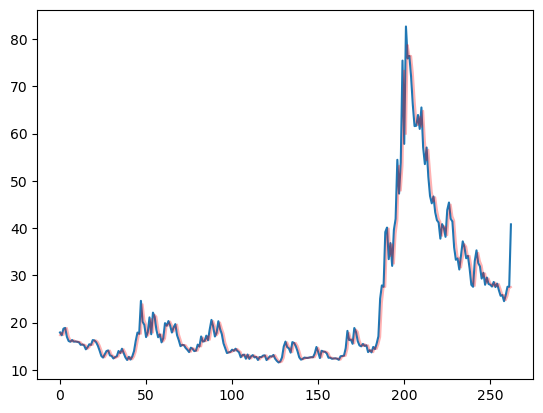

CPU times: total: 1min 39s
Wall time: 22.4 s


In [14]:
%%time
# split into train and test sets
X = df.CLOSE.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red', alpha=.3)
plt.show()

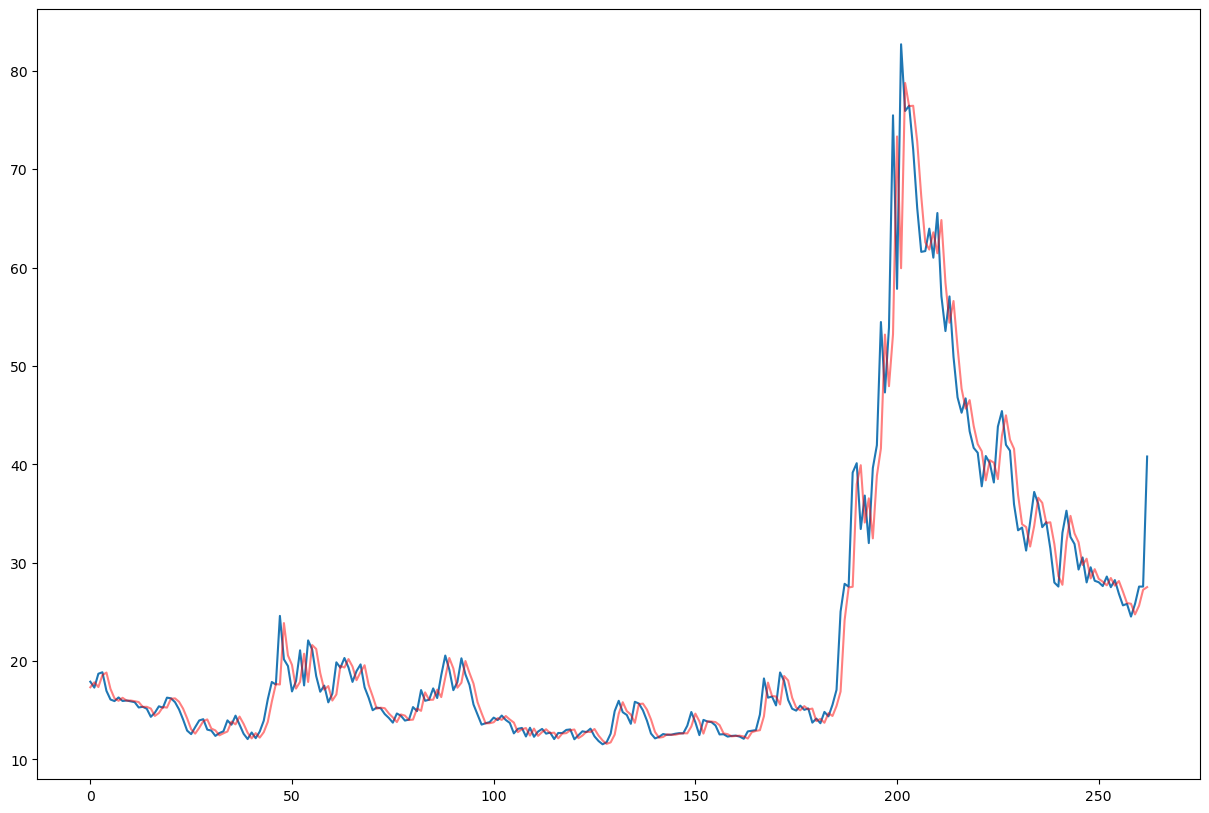

In [15]:
plt.figure(figsize=(15,10))
plt.plot(test)
plt.plot(predictions, color = 'red', alpha=.5)

In [16]:
# Finally, we can find the optimum ARIMA model for our data.
# Nb. this can take a while...!
#evaluate_models(series ,p_values, d_values, q_values)
#ARIMA_MSE(y, (1,1,0))

In [17]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 1)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [20]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
## should adapt with split a parameter
def evaluate_arima(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split= int(len(data) * 0.9) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit()
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

In [21]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.
# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p, d, q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [27]:
%%time
evaluate_models(X,p_values, d_values, q_values )

ARIMA(2, 1, 0) MSE=11.048
ARIMA(2, 1, 1) MSE=11.577
ARIMA(2, 1, 2) MSE=11.565
ARIMA(2, 2, 0) MSE=13.142
ARIMA(2, 2, 1) MSE=11.058
ARIMA(2, 2, 2) MSE=10.871
Best ARIMA(2, 2, 2) MSE=10.871
CPU times: total: 31min 41s
Wall time: 18min 15s


In [24]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(1, 2)]
d_values = [x for x in range(1, 3)]
q_values = [x for x in range(0, 3)]

In [25]:
%%time
evaluate_models(X,p_values, d_values, q_values )

ARIMA(1, 1, 0) MSE=10.872
ARIMA(1, 1, 1) MSE=11.783
ARIMA(1, 1, 2) MSE=11.644
ARIMA(1, 2, 0) MSE=16.253
ARIMA(1, 2, 1) MSE=10.884
ARIMA(1, 2, 2) MSE=5679797.845
Best ARIMA(1, 1, 0) MSE=10.872
CPU times: total: 28min 1s
Wall time: 14min 44s


In [28]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(3, 4)]
d_values = [x for x in range(2, 4)]
q_values = [x for x in range(2, 4)]

In [ ]:
%%time
evaluate_models(X,p_values, d_values, q_values )

Take the selected model and perform a walk forward validation

In [13]:
df['Neg_pct'] = df.Negative / df.Total
X = df[['CLOSE','Neg_pct']].values

In [22]:
size = int(len(X) * 0.9) 
train, test = X[0:size], X[size:len(X)] 
history = [x[0] for x in train] 
X_test = [x[0] for x in test]
exog_hist = [x[1] for x in train]
exog_test = [x[1] for x in test]
predictions = list()

In [26]:
# walk-forward validation 

for t in range(len(test)):
    model = SARIMAX(history,exog=exog_hist, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast(exog=exog_test[t])
    yhat = output[0]
    predictions.append(yhat)
    obs = X_test[t]
    exog_obs = exog_test[t]
    history.append(obs)
    exog_hist.append(exog_obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=17.442500, expected=17.900000
predicted=17.944759, expected=17.300000
predicted=17.818146, expected=18.710000
predicted=17.965617, expected=18.860000
predicted=18.826208, expected=16.970000
predicted=17.443269, expected=16.090000
predicted=15.955146, expected=15.930000
predicted=15.985184, expected=16.300000
predicted=16.112463, expected=15.940000
predicted=16.079676, expected=15.990000
predicted=16.115658, expected=15.910000
predicted=15.905121, expected=15.820000
predicted=15.897914, expected=15.280000
predicted=15.174782, expected=15.350000
predicted=15.227288, expected=15.150000
predicted=15.193607, expected=14.330000
predicted=14.352974, expected=14.750000
predicted=14.903389, expected=15.400000
predicted=15.467641, expected=15.260000
predicted=15.041972, expected=16.280000
predicted=16.551499, expected=16.210000
predicted=15.834750, expected=15.820000
predicted=15.857856, expected=15.080000
predicted=15.097089, expected=14.060000
predicted=14.154692, expected=12.930000


predicted=71.680779, expected=66.040000
predicted=68.194778, expected=61.590000
predicted=60.597747, expected=61.670000
predicted=61.311861, expected=63.950000
predicted=63.604835, expected=61.000000
predicted=61.454467, expected=65.540000
predicted=65.026002, expected=57.080000
predicted=58.725619, expected=53.540000
predicted=55.588223, expected=57.060000
predicted=55.233118, expected=50.910000
predicted=52.469359, expected=46.800000
predicted=46.355827, expected=45.240000
predicted=45.565517, expected=46.700000
predicted=46.340674, expected=43.350000
predicted=44.151937, expected=41.670000
predicted=43.162732, expected=41.170000
predicted=40.281267, expected=37.760000
predicted=39.393744, expected=40.840000
predicted=39.258186, expected=40.110000
predicted=39.611706, expected=38.150000
predicted=39.276729, expected=43.830000
predicted=43.325628, expected=45.410000
predicted=44.427311, expected=41.980000
predicted=42.228415, expected=41.380000
predicted=41.719242, expected=35.930000


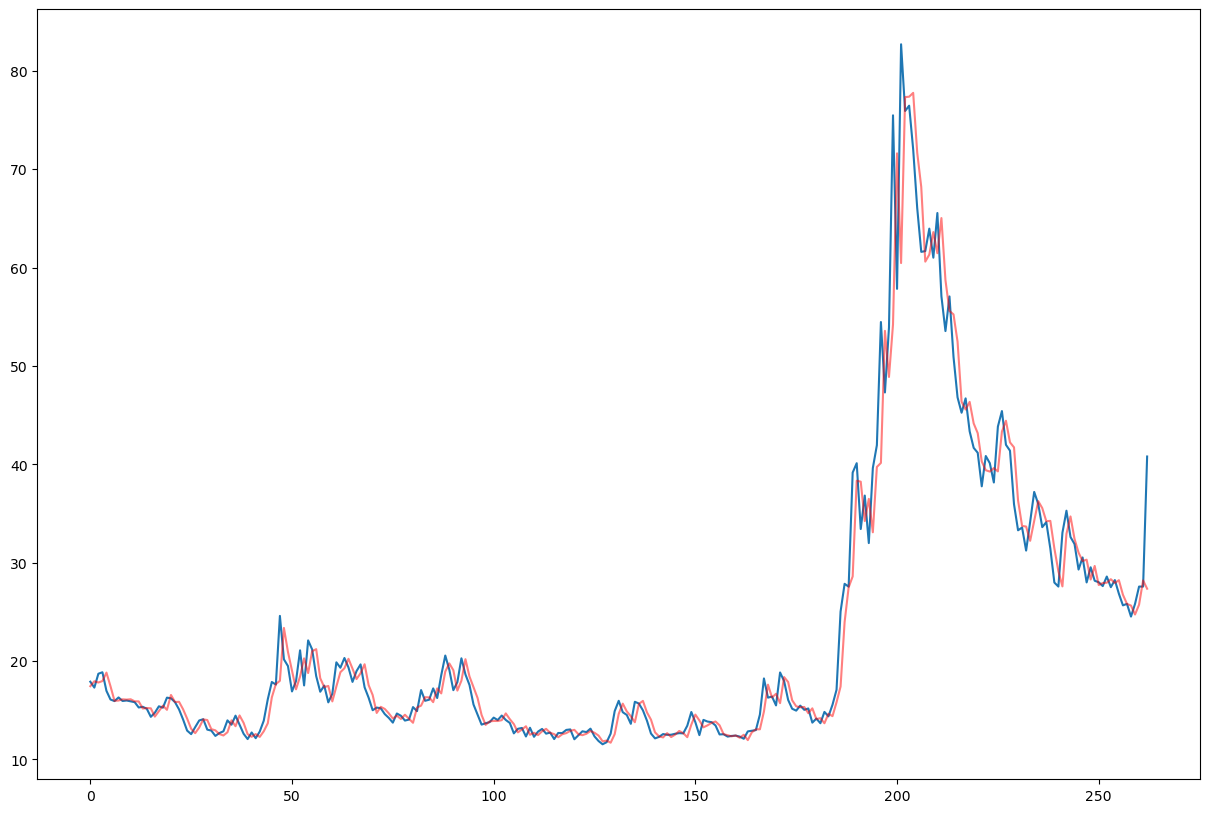

In [27]:
plt.figure(figsize=(15,10))
plt.plot(history[size:len(X)] )
plt.plot(predictions, color = 'red', alpha=.5)

Add in the negative count.

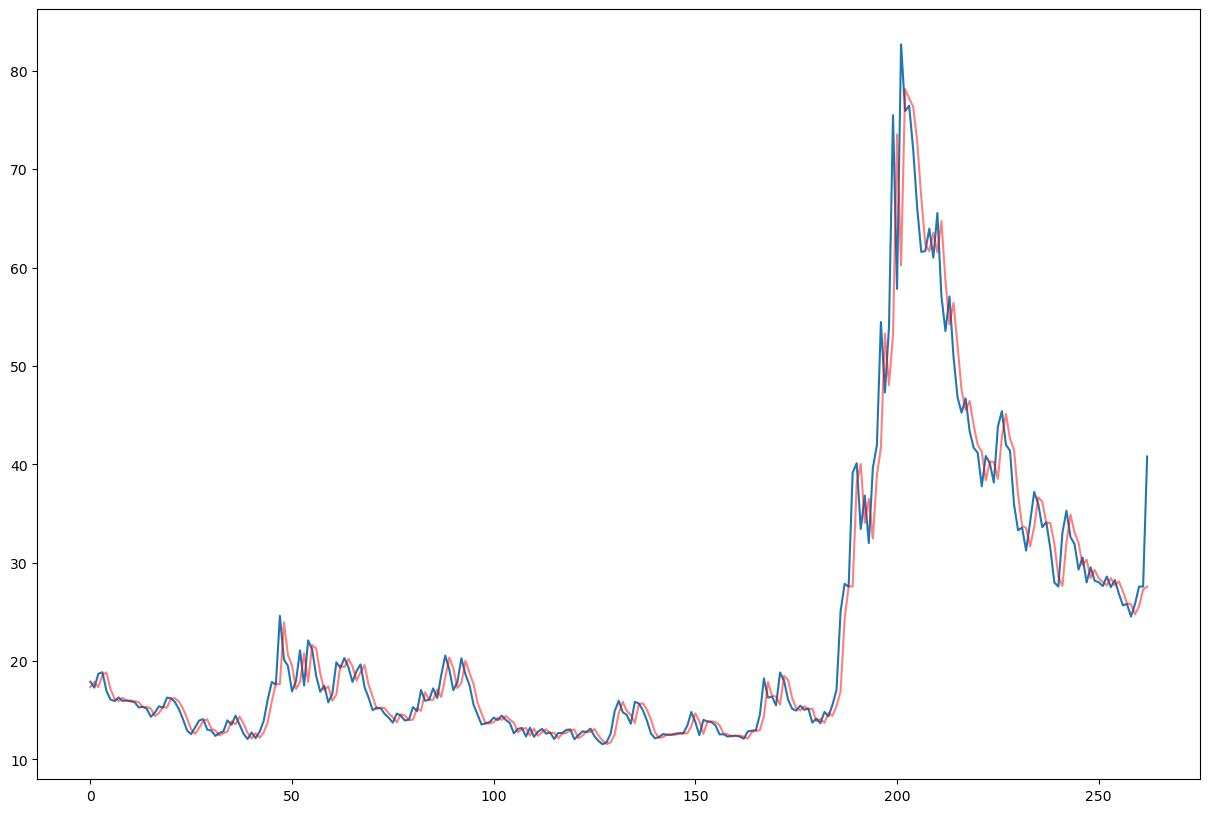

In [11]:
plt.figure(figsize=(15,10))
plt.plot(history[size:len(X)] )
plt.plot(predictions, color = 'red', alpha=.5)

In [33]:
# set up for SARIMAX
#   this was the nonworking setup
# train = data.loc[:'2012-12-13','age6-15']
# exog = data.loc[:'2012-12-13','Daily mean temp']
# mod = sm.tsa.statespace.SARIMAX(train, exog=exog, trend='n', order=(0,1,0), seasonal_order=(1,1,1,52))
# results = mod.fit()
# predictions = results.predict(start = '2012-12-13', end = '2016-12-22', dynamic= True)

train = data.loc[:'2012-12-13','age6-15']
exog = data.loc[:'2012-12-13','Daily mean temp']
mod = sm.tsa.statespace.SARIMAX(train, exog=exog, trend='n', order=(0,1,0), seasonal_order=(1,1,1,52))
results = mod.fit()

exog_forecast = data.loc['2012-12-13':'2016-12-22',,'Daily mean temp']
predictions = results.predict(start = '2012-12-13', end = '2016-12-22' exog=exog_forecast, dynamic= True)

KeyError: '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] not in index'